<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Sivert Escaff 
- Nombre de alumno 2: Rodrigo Montecinos

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
!pip install xgboost

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('diabetes_data.csv')


print(df.describe())
print(df.head())

# Data exploration
print(df.info())

# Selecting features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Column transformer with scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), ['GenHlth', 'PhysHlth', 'BMI']),
        ('std', StandardScaler(), ['Age', 'MentHlth'])
    ],
    remainder='passthrough',  
    verbose_feature_names_out=False
)

# Create the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


                Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914      0.456924      0.487345

c:\Users\siver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11651
         1.0       0.73      0.79      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



La distribución presentada por Age y MentHLth es más parecida a una normal por lo tanto en ella se utilizó StandarScaler, mientras que el resto posee una más uniforme y con los límites más definidos, así que se procede a utilizar MinMaxScaler, las métricas buscan expresar que tan correcto estuvo en todo el conjunto de datos, que tal estuvo dentro de los positivos y también que tan bien se clasifica considerando los falsos positivos, en este contexto es mucho mejor utilizar ReCall ya que da la oportunidad de tomar a la mayor cantidad de personas que tengan la posibilidad de tener cancer y no dejar a personas con cáncer clasificadas como si no tuvieran.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

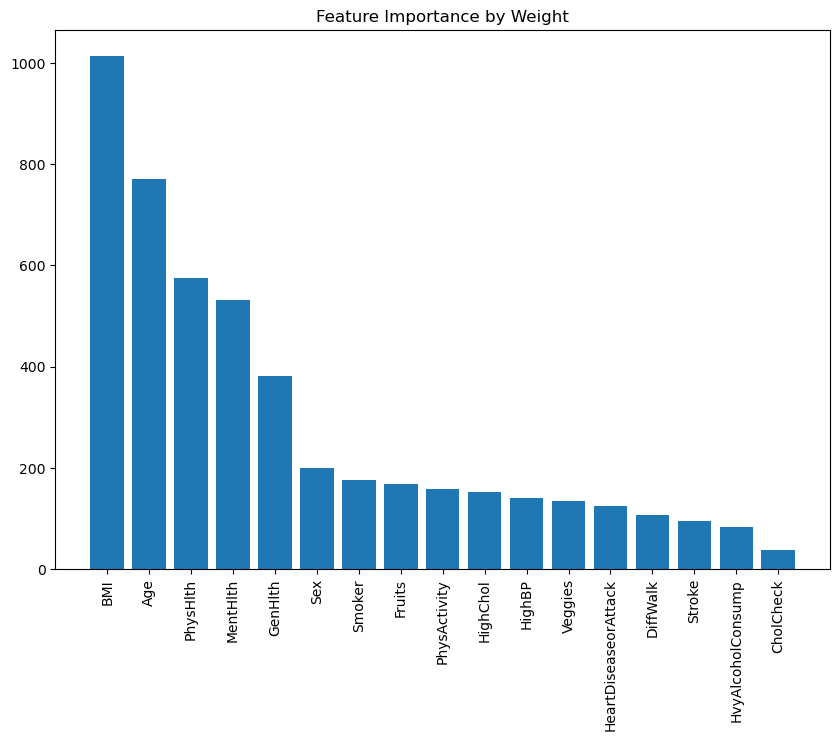

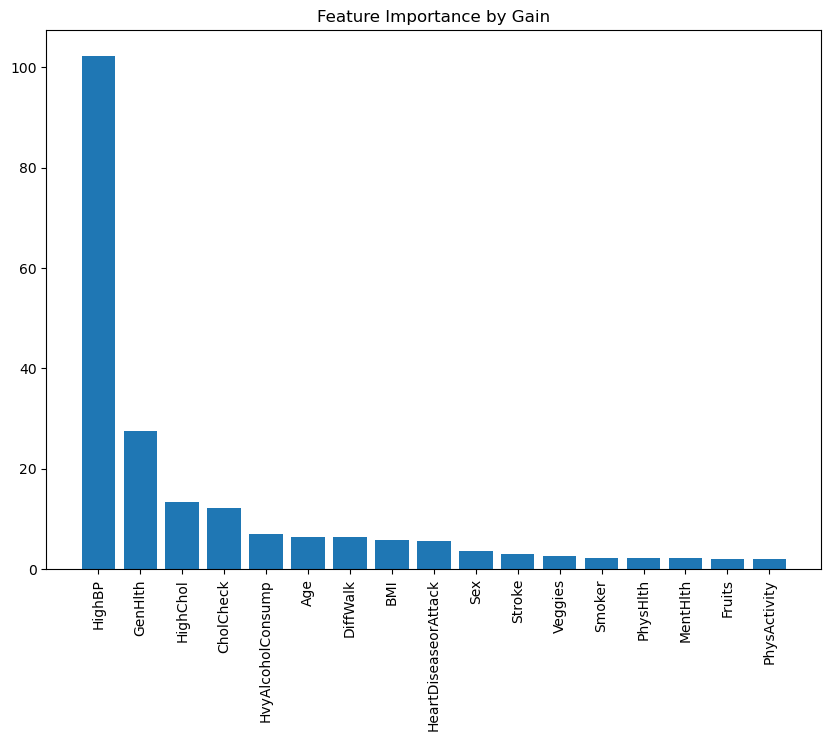

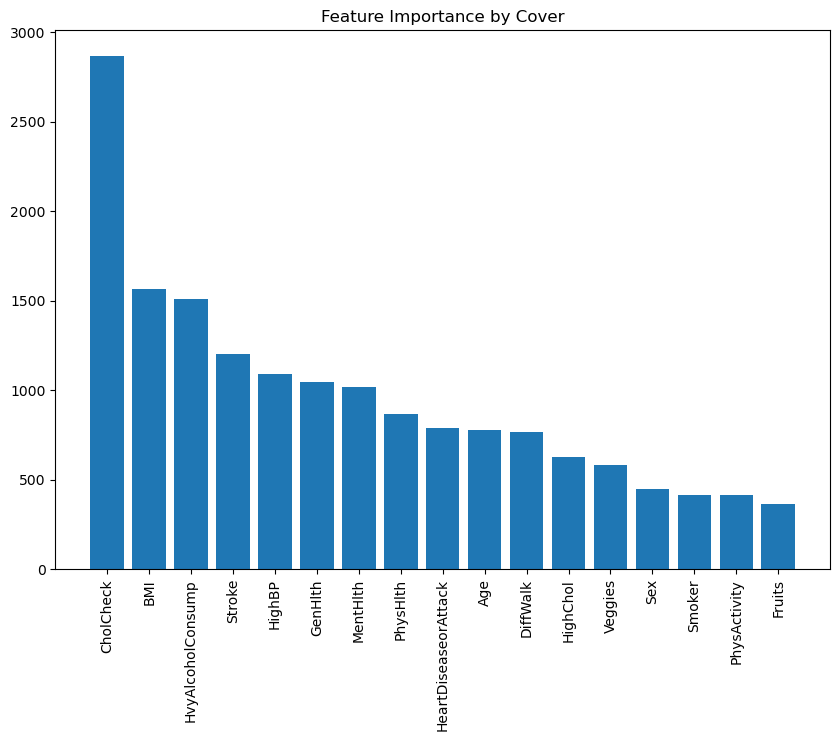

In [5]:
import matplotlib.pyplot as plt
import xgboost as xgb


model = pipeline.named_steps['classifier']
transformed_features = pipeline.named_steps['preprocessor'].transform(X_train)

# Retrieve feature names after transformation
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Calculate feature importances using different importance types
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')

# Function to plot feature importances
def plot_importance(importance, title):
    sorted_idx = sorted(importance, key=importance.get, reverse=True)
    plt.figure(figsize=(10, 7))
    plt.bar(range(len(sorted_idx)), [importance[i] for i in sorted_idx], align='center')
    plt.xticks(range(len(sorted_idx)), [feature_names[int(i[1:])] for i in sorted_idx], rotation=90)
    plt.title(title)
    plt.show()

# Plotting feature importances
plot_importance(importance_weight, 'Feature Importance by Weight')
plot_importance(importance_gain, 'Feature Importance by Gain')
plot_importance(importance_cover, 'Feature Importance by Cover')


Los resultados son compatibles, porque cada uno de los métodos utilizados tienen distintos objetivos y distintas formas de medir lo que se busca, por ejemplo Gain te muestra la importancia de los elementos al influir en la precisión, mientras que el peso te muestra la influencia que tiene en el modelo la frecuencia con la que aparece cada feature. Por tanto es igual de importante poder analizar las tres por si solas, dependiendo lo que uno busca concluir en el modelo. Lo que si estaría bueno sería considerar una feature importancia general para poder aclarar mejor cuales son en promedio las características más importantes para el diagnóstico final, por tanto, una de sus debilidades es que visualmente es difícil concluir en términos generales la mejor feature.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

Calculando importancias por permutación: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]


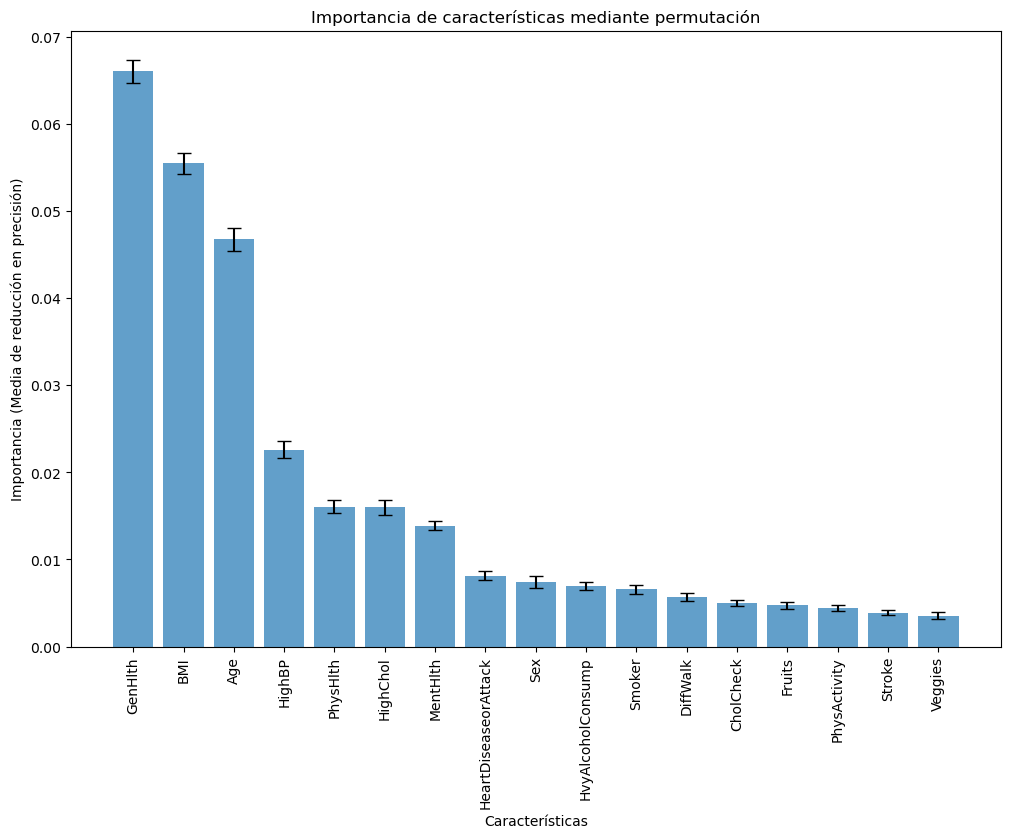

In [6]:
from sklearn.metrics import accuracy_score  # O la métrica que prefieras
from tqdm import tqdm  # Para mostrar una barra de progreso


def permutation_importance(model, X, y, metric=accuracy_score, n_repeats=30):

    base_score = metric(y, model.predict(X))
    
    importances = np.zeros((n_repeats, X.shape[1]))
    
    # Iterar sobre cada repetición
    for i in tqdm(range(n_repeats), desc="Calculando importancias por permutación"):
        # Iterar sobre cada característica
        for col in range(X.shape[1]):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, col])
            
            permuted_score = metric(y, model.predict(X_permuted))
            
            importances[i, col] = base_score - permuted_score
    
    mean_importances = np.mean(importances, axis=0)
    std_importances = np.std(importances, axis=0)
    
    return mean_importances, std_importances


X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
y_train = y_train
mean_importances, std_importances = permutation_importance(model, X_transformed, y_train)

def plot_permutation_importance(mean_importances, std_importances, feature_names):
    sorted_idx = np.argsort(mean_importances)[::-1]
    sorted_means = mean_importances[sorted_idx]
    sorted_stds = std_importances[sorted_idx]
    sorted_features = feature_names[sorted_idx]
    
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(sorted_features)), sorted_means, yerr=sorted_stds, align='center', alpha=0.7, capsize=5)
    plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia (Media de reducción en precisión)")
    plt.title("Importancia de características mediante permutación")
    plt.show()

feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
plot_permutation_importance(mean_importances, std_importances, feature_names)


Al final esto mide que tanto varía la presición del modelo al permutar la variable, entonces este gráfico te da un grado más específico relacionado a la importancia de cada feature, en comparado a los métodos realizados antes. Las features más importantes son GenHlth, BMI, Age, HighBP y HighChol y tienen todo el sentido del mundo considerando los conocimientos sobre la diabetes y las personas que son más propensas a tenerlo. Las conclusiones cambian mucho, pues en las anteriores era imposible sacar una conclusión acorde debido a todos las diferencias mostradas por cada método.

### Impacto de las Características en el Modelo
- **Principales características**:
  - `GenHlth` (Salud general): Mayor impacto, correlaciona con el riesgo de diabetes.
  - `BMI` (Índice de masa corporal): Factor conocido en el riesgo de diabetes.
  - `Age` (Edad): El riesgo aumenta con la edad.
  - `HighBP` (Presión arterial alta): Asociada con un mayor riesgo de diabetes.
  - `HighChol` (Colesterol alto): Comorbilidad común en pacientes diabéticos.

### Análisis de Importancia de Características
- **Características Claves**:
  - `BMI` y `Age` son las más influyentes según el peso.
  - `HighBP` destaca por ganancia, indicando un impacto significativo al modelo.
  - `CholCheck` sobresale en cobertura, afectando a numerosas muestras.

### Comparación de Métodos
- Los métodos revelan diferencias en la valoración de las características:
  - **Peso**: Muestra frecuencia de uso.
  - **Ganancia**: Indica efectividad en la mejora del modelo.
  - **Cobertura**: Evalúa el impacto en el número de muestras.
- La importancia de permutación sugiere que `GenHlth` y `BMI` son esenciales, diferenciándose de otros métodos que enfocan en características distintas dependiendo del tipo de impacto medido.

Este análisis destaca la necesidad de emplear múltiples perspectivas de importancia para entender completamente cómo las características influyen en el modelo.


### Ventajas y Desventajas de la Importancia de Permutación
- **Ventajas**:
  1. **Agnóstica al Modelo**: Se puede usar con cualquier modelo.
  2. **Menos Sesgo**: Menor probabilidad de inflar la importancia de variables continuas o categóricas de alta cardinalidad.
  3. **Refleja el Impacto en el Rendimiento**: Mide directamente la caída en el rendimiento del modelo al ocultar la información de cada característica.
  
- **Desventajas**:
  1. **Costo Computacional**: Es intensivo, especialmente con grandes conjuntos de datos o modelos complejos.
  2. **Variación Aleatoria**: La aleatoriedad en la permutación puede llevar a variabilidad en las puntuaciones de importancia.
  3. **Posible Malinterpretación**: Si no se analiza cuidadosamente, si existen variables correlacionadas estas podrian presentar mas importancia de la real.


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [7]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ------- -------------------------------- 81.9/456.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.8 MB/s eta 0:00:00


In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [9]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_transformed)

shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=feature_names)


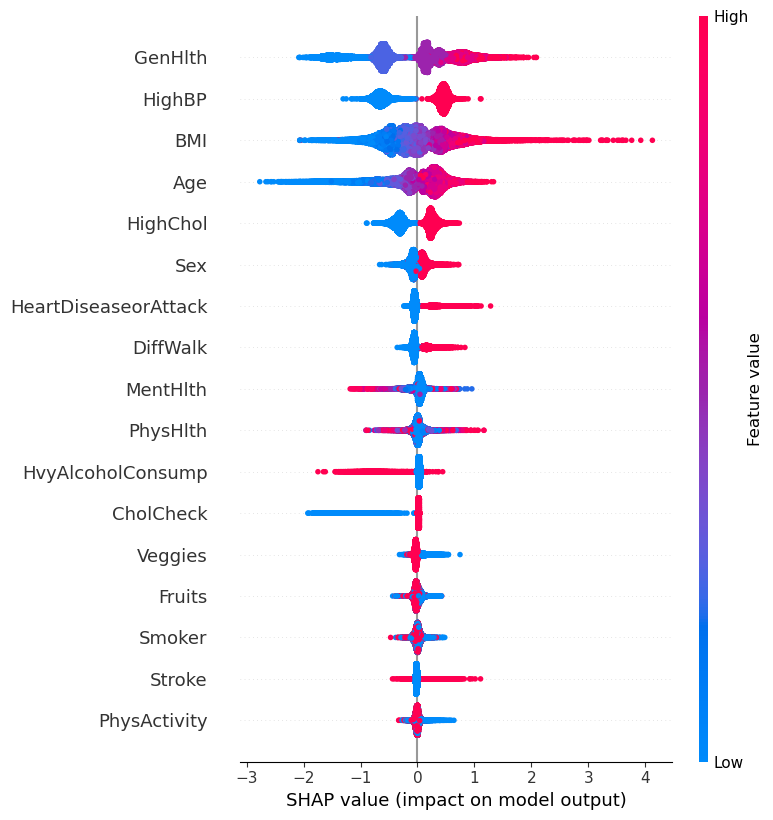

In [10]:
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

## Explicación de SHAP Values


Los **valores SHAP** (SHapley Additive exPlanations) explican la contribución de cada característica al pronóstico de un modelo para una observación individual, utilizando la teoría de juegos. Cada valor SHAP muestra el efecto de tener una característica en particular en comparación con la predicción que se haría en su ausencia.

### Interpretación de los valores SHAP
Cada número en los resultados de SHAP representa el impacto de una característica en la predicción del modelo. Un valor SHAP positivo indica que la característica incrementa la probabilidad de un resultado (por ejemplo, mayor riesgo de diabetes), mientras que un valor negativo disminuye esa probabilidad.

### Positividad/Negatividad de los valores SHAP
- **Positivo**: Si el valor SHAP de una característica es positivo, significa que la presencia de esta característica aumenta la predicción del resultado.
- **Negativo**: Si el valor SHAP de una característica es negativo, significa que reduce la predicción del resultado.

Estos valores ayudan a entender cómo diferentes características influyen en el resultado del modelo de manera individual, ofreciendo una base para interpretaciones detalladas y personalizadas a nivel de cada observación o paciente.


### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

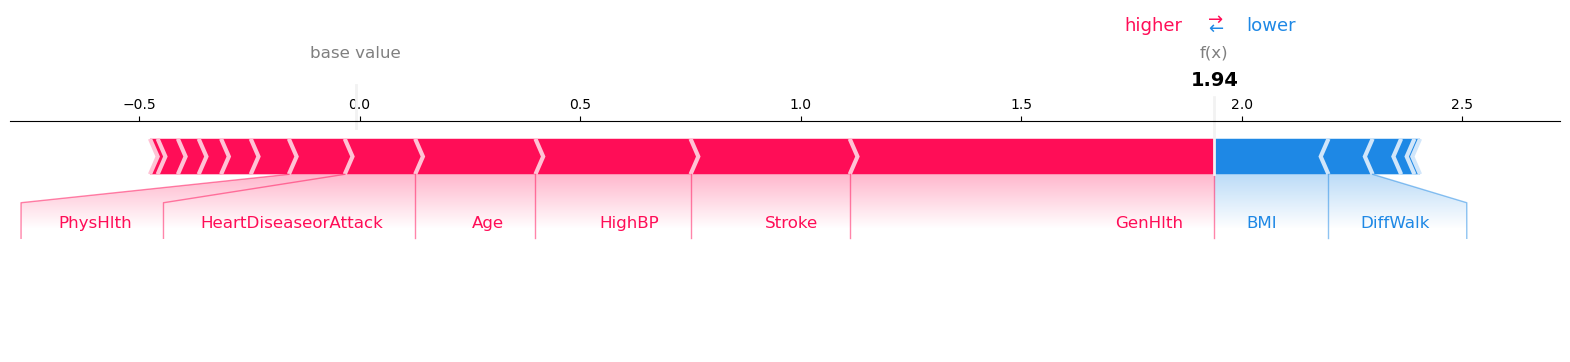

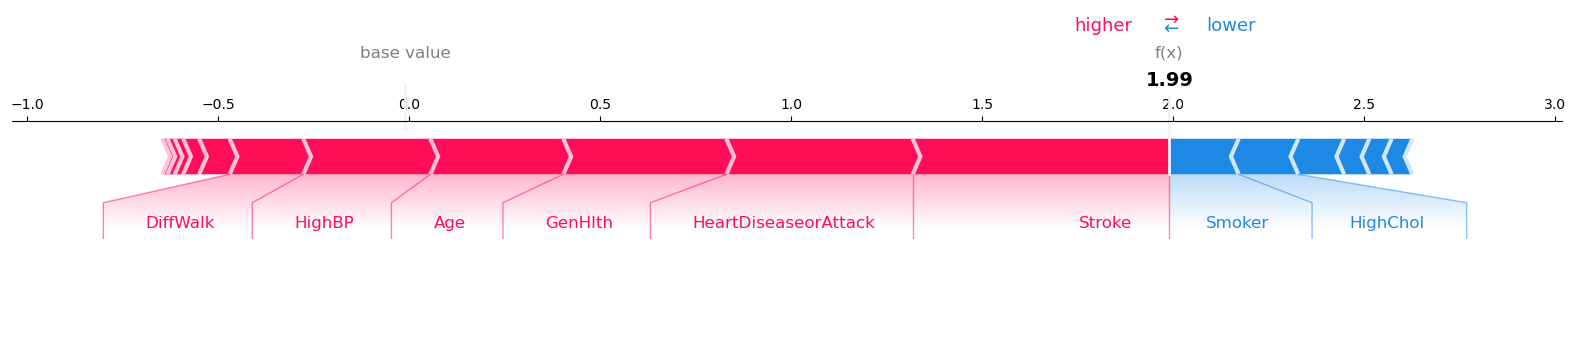

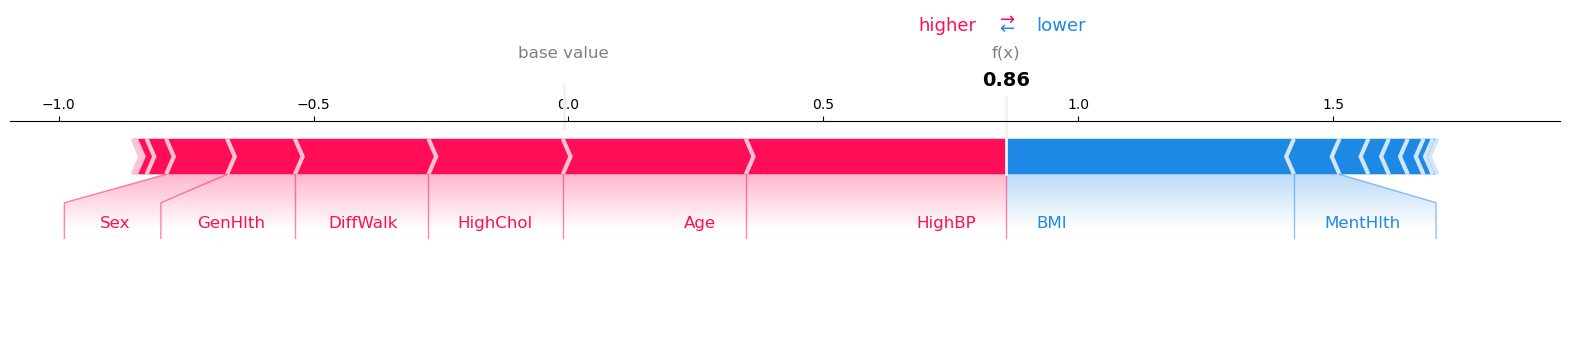

In [11]:
patients = [0, 8, 149]

for patient in patients:
    shap.force_plot(explainer.expected_value, shap_values[patient], feature_names=feature_names, matplotlib=True)



### Impacto de las caracteristicas en la diabetes
- **Aumentan el riesgo**:
  - **Salud general (`GenHlth`)**: Indica que peores condiciones generales de salud incrementan el riesgo.
  - **Indice de masa corporal (`BMI`)**: Un indice más alto está claramente relacionado con un mayor riesgo.
  - **Edad (`Age`)**: A medida que aumenta la edad, también lo hace el riesgo.
  
- **Disminuyen el riesgo**:
  - **Salud FISICA (`PhysHlth`)**: dias con problemas de salud física pueden mostrar una correlación con menor riesgo en este modelo, lo cual podría depender de cómo se manejen otros factores de salud.
  - **Sexo (`Sex`)**: Ser hombre puede aparecer como un factor de menor riesgo en este analisis.

### Patrones comunes
- Las variables como la salud general, el índice de masa corporal y la edad son consistentemente influyentes a través de las muestras analizadas, sugiriendo un patrón común de factores de riesgo.
- Generalizar estos hallazgos a todo el conjunto de datos debe hacerse con cuidado. Estos patrones brindan insights útiles, pero cada caso es único y podría ser influenciado por interacciones complejas de características.


### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

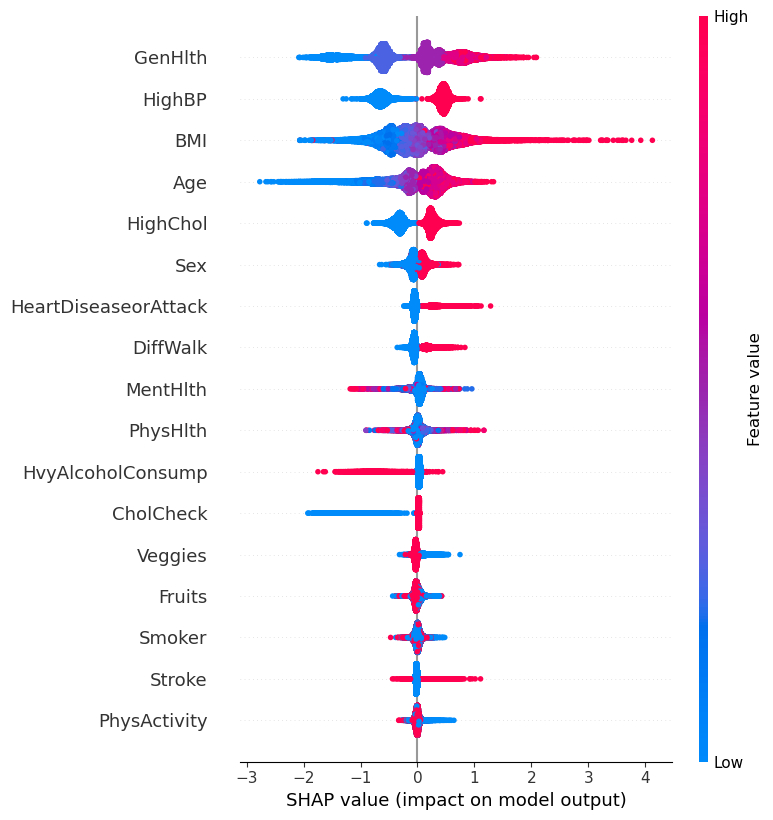

In [12]:
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

Es la diferencia de que se puede entender mejor el comportamiento de cada variable, dado que como tenemos más información es más fácil ver la tendencia de cada uno. Ayuda a sacar mejores conclusiones la visualización global.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

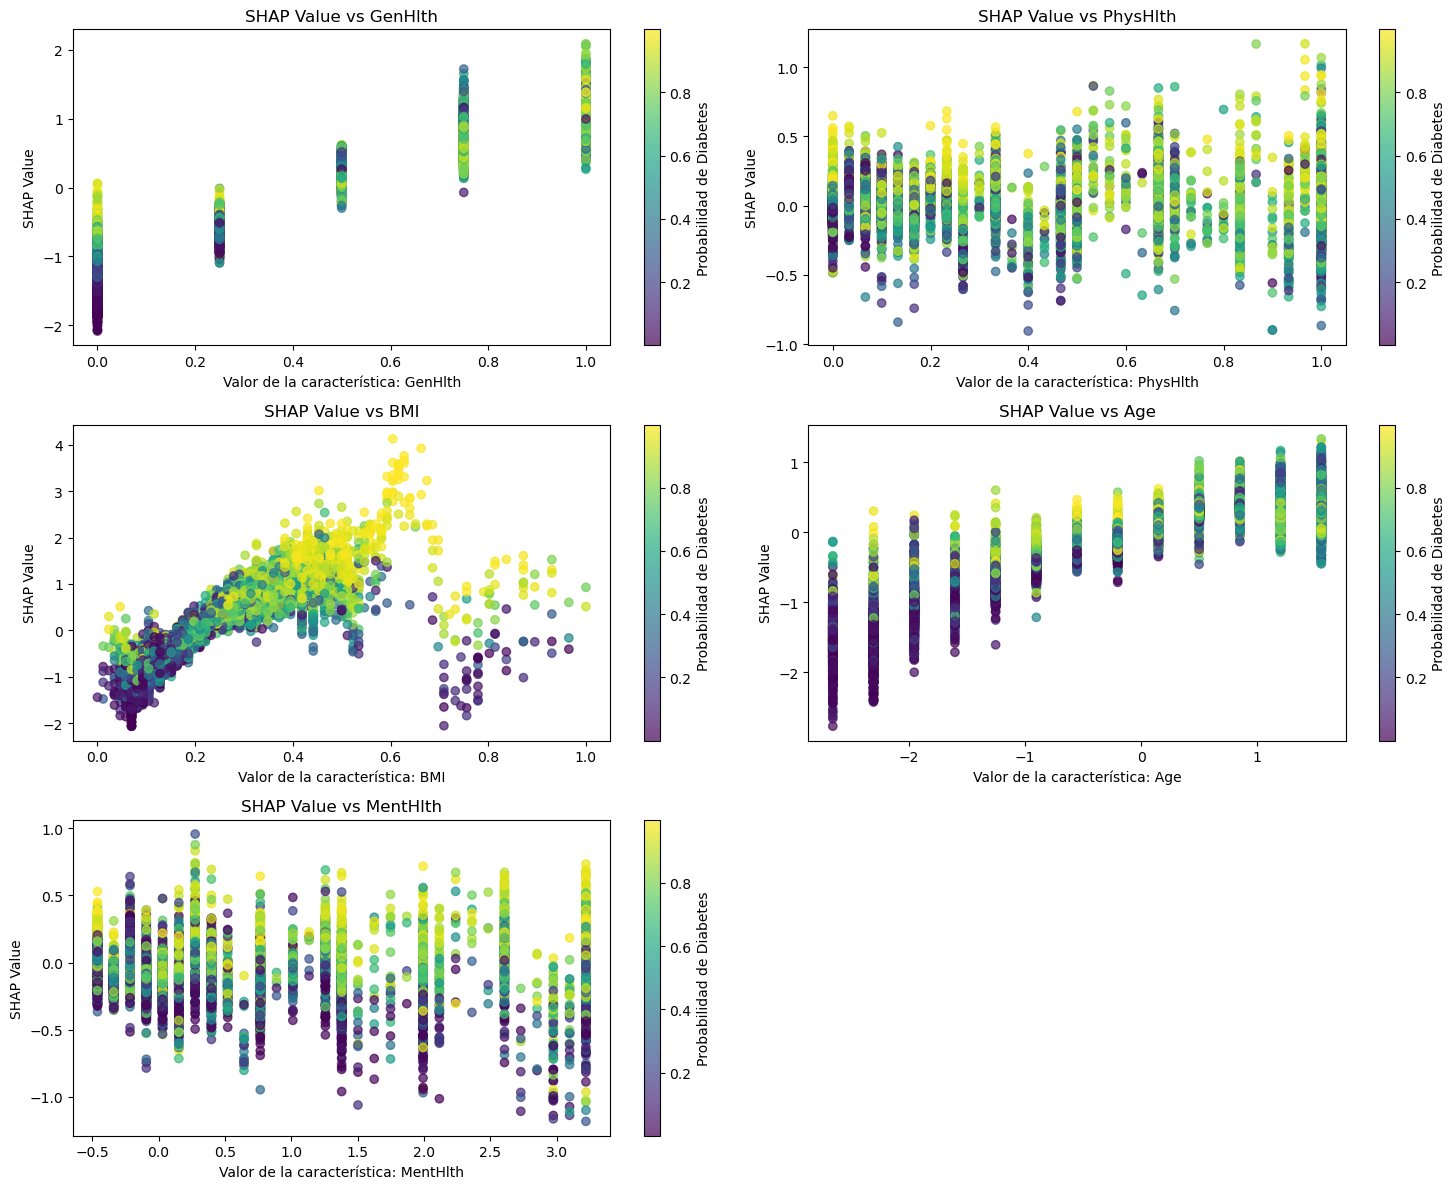

In [13]:
diabetes_probabilities = model.predict_proba(transformed_features)[:, 1]


top_features = feature_names[:5]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X_transformed[:, i], shap_values[:, i], c=diabetes_probabilities, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Probabilidad de Diabetes')
    plt.xlabel(f'Valor de la característica: {feature}')
    plt.ylabel('SHAP Value')
    plt.title(f'SHAP Value vs {feature}')
    
plt.tight_layout()
plt.show()

Muestra lo mismo que SHAP values pero de una manera más directa en cada feature, se pueden sacar las mismas conclusiones.


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [36]:
pip install -U scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.1/11.0 MB 469.7 kB/s eta 0:00:24
    --------------------------------------- 0.2/11.0 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.2/11.0 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 9.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.0 MB 11.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.4/11.0 MB 12.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 14.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/11.0 MB 15.1 MB/s eta 0:00:01
   ----------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires category-encoders>=2.4.0, which is not installed.
pycaret 3.3.2 requires deprecation>=2.1.0, which is not installed.
pycaret 3.3.2 requires kaleido>=0.2.1, which is not installed.
pycaret 3.3.2 requires plotly-resampler>=0.8.3.1, which is not installed.
pycaret 3.3.2 requires pmdarima>=2.0.4, which is not installed.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
pycaret 3.3.2 requires schemdraw==0.15, which is not installed.
pycaret 3.3.2 requires sktime==0.26.0, which is not installed.
pycaret 3.3.2 requires tbats>=1.1.3, which is not installed.
pycaret 3.3.2 requires xxhash, which is not installed.
pycaret 3.3.2 requires yellowbrick>=1.4, which is not installed.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.4.2 which is i

In [37]:
from sklearn.inspection import plot_partial_dependence




top_features = feature_names[:5]


# Crear el Partial Dependence Plot para las top features
fig, ax = plt.subplots(figsize=(12, 10))
display = plot_partial_dependence(
    model, X_train, features=top_features,
    n_jobs=3, grid_resolution=50, ax=ax
)
display.figure_.suptitle('Partial Dependence of top 5 features')
plt.subplots_adjust(top=0.9)  # Ajustar el título para que no se solape
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\siver\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

No se por que no se puede importar :c lo siento

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [23]:
!pip install alibi

     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ---------------------------------------- 44.1/44.1 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     -------------------------------------- 149.4/149.4 kB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/522.1 kB ? eta -:--:--
   --------------------------------------- 522.1/522.1 kB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
   ---- ----------------------

In [24]:
from alibi.explainers import AnchorTabular

In [30]:
# Extraer datos preprocesados
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Convertir a DataFrame para mayor facilidad en el análisis
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)


ValueError: Shape of passed values is (47363, 17), indices imply (47363, 5)

In [26]:

observaciones = [1000, 3001, 5751]
shap_vals_observaciones = [shap_values[idx] for idx in observaciones]

for obs_idx, shap_val in zip(observaciones, shap_vals_observaciones):
    print(f"Observación {obs_idx}")
    print(sorted(zip(feature_names, shap_val), key=lambda x: abs(x[1]), reverse=True)[:5])


Observación 1000
[('HighBP', 0.5249148), ('BMI', 0.5234492), ('GenHlth', 0.4853352), ('HighChol', 0.28092775), ('MentHlth', 0.09791611)]
Observación 3001
[('GenHlth', 0.9656148), ('Age', 0.6346125), ('HighBP', -0.63458604), ('BMI', -0.44739655), ('HighChol', -0.21144816)]
Observación 5751
[('HighBP', 0.39034507), ('Age', 0.3858885), ('HighChol', -0.3119337), ('GenHlth', 0.1334866), ('Sex', -0.081736065)]


In [29]:
def decision_rules(data):
    rules = []

    rules.append((data['HighBP'] > 0.5249148) & (data['BMI'] < 0.5234492))

    return rules


In [30]:
# Evaluar las reglas en X_train_df o X_test_df y calcular precisión
matching_cases = X_test_df.apply(decision_rules, axis=1)
accuracy = accuracy_score(y_test, matching_cases)  # y_test es el conjunto de etiquetas reales


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

El modelo de XGBoost es un modelo muy potente al utilizarlo para clasificar y además la manera de sacar la feature importance en la forma de permutaciones es la ideal, pues te muestra la real importancia de como se deberían analizar los elementos y aun más al utilizar SHAP values podemos saber como pueden afectar en el caso de que sea más positivo o negativo. En el caso de diagnosticar siempre es mejor utilizar casos locales, pero para sacar conclusiones más generales, es importante saber el comportamiento global de la enfermedad.

### Evaluación de Métodos para la Clasificación de Diabetes

En la tarea de clasificación de diabetes del Dr. Simi, la utilización del modelo **XGBoost** es altamente efectiva. Este modelo no solo es robusto y maneja eficientemente grandes volúmenes de datos, sino que también ofrece métodos avanzados para interpretar la importancia de las características:

- **Importancia Global:** XGBoost permite evaluar la importancia de las características a nivel global usando métricas como el 'weight', 'gain', y 'cover'. Estos métodos proporcionan una visión amplia sobre cuáles características tienen más influencia en las predicciones del modelo, permitiendo entender mejor el comportamiento general de la enfermedad en la población.

- **SHAP Values (Métodos Locales):** Para un análisis más detallado y personalizado, especialmente útil en un contexto clínico donde las decisiones individuales son cruciales, los SHAP values son extremadamente valiosos. Ofrecen una explicación detallada del impacto de cada característica en la predicción de un caso individual, lo que ayuda a comprender cómo diferentes factores contribuyen al resultado de la predicción, positiva o negativa.



Como conclusion para el caso del Dr. Simi, combinar estos métodos ofrece un enfoque balanceado: mientras que las métricas globales de importancia de XGBoost dan una visión general del impacto de las características, los SHAP values proporcionan explicaciones detalladas y personalizadas necesarias para la toma de decisiones médicas. Este enfoque combinado no solo optimiza el rendimiento del modelo, sino que también mejora su interpretabilidad y la confianza en sus predicciones.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>